In [1]:
import os
import sys
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

In [6]:
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

In [12]:
figsave_format = 'pdf'
figsave_dpi = 200

# Bold text format
b1 = '\033[1m'
b0 = '\033[0m'

In [13]:
with open('../data/spectra.dat') as f:
    lines = [line.split('\n')[0] for line in f]
    data_bin = [int(line) \
                for line in lines[lines.index('<<DATA>>')+1:lines.index('<<END>>')]]
    data_roi = sorted([[int(i) for i in line.split(' ')] \
                       for line in lines[lines.index('<<ROI>>')+1:lines.index('<<DATA>>')]])

# Convert ROI to keV from bin values
data_roi_e = [[0.9255 * x - 1.7434 for x in i] for i in data_roi]

data_roi_y = [[0, 3500],
              [0, 2000],
              [0, 15000],
              [0, 2000],
              [0, 700],
              [0, 1000]]

In [14]:
# There should be 4095 bins in the amplitude-analizator, but only 4083 did actually work
# Here : len(data_bin) == 4083
amp_an_bins = len(data_bin)
# Equation for transforming from bins to keV
# keV = 0.9255 * BIN_VALUE - 1.7434
LOWER_LIM = 0.9255 * 0 - 1.7434
UPPER_LIM = 0.9255 * amp_an_bins - 1.7434
print(b1 + 'Lower limit of X axis :' + b0, LOWER_LIM)
print(b1 + 'Upper limit of X axis :' + b0, UPPER_LIM)
# Bins with energy values
energy_bins = np.linspace(LOWER_LIM, UPPER_LIM, amp_an_bins)

Lower limit of X axis : -1.7434
Upper limit of X axis : 3777.0731


In [11]:
# Gamma photon names
# 143.768 keV : U235 - g4,1 (Here: 145.28 keV)
# 163.358 keV : U235 - g5,1 (Here: 164.75 keV)
# 185.722 keV : U235 - g4,0 (Here: 186.79 keV)
# 205.316 keV : U235 - g5,0 (Here: 206.10 keV)
# ? keV : ? (Here: 764.24 keV)
# 1001.441 keV : Pa234m - g9,1 (Here: 998.77 keV)
gammas = ['$^{235}$U - $\gamma_{4,1}$',
          '$^{235}$U - $\gamma_{5,1}$',
          '$^{235}$U - $\gamma_{4,0}$',
          '$^{235}$U - $\gamma_{5,0}$',
          'Unknown',
          '$^{234}$Pa$^{m}$ - $\gamma_{9,1}$']

gamma_names = ['U235_g4_1',
               'U235_g5_1',
               'U235_g4_0',
               'U235_g5_0',
               'Unknown',
               'Pam234_g9_1']

gamma_colors = ['tab:red',
                'tab:green',
                'tab:orange',
                'tab:purple',
                'tab:grey',
                'tab:brown',]

## Plot spectra and characteristic peaks peaks

In [174]:
def plot_spectra(lims=None, save=False, plot_type='line', name=None):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(ncols*14,nrows*12))
    G = gridspec.GridSpec(nrows, ncols)
    G.update(hspace=0.35, wspace=0.2)
    axes = [plt.subplot(G[i]) for i in range(ncols)]

    suptitlesize = 50
    titlesize = 40
    axislabelsize = 40
    axisticksize = 30
    legendsize = 25

    if lims is not None:
        linewdt = 2
        '''
        if name is not None:
            plt.suptitle('{0} gamma peak of my sample '.format(name) +
                         '(small, yellow crystal)\n',
                         fontweight='bold', fontsize=suptitlesize, y=1.08)

        else:
            plt.suptitle('One of the gamma peak of my sample ' +
                         '(small, yellow crystal)\n',
                         fontweight='bold', fontsize=suptitlesize, y=1.08)
        '''
    else:
        linewdt = 2
        '''
        plt.suptitle('Gamma spectra of my measured sample ' +
                     '(small, yellow crystal)',
                     fontweight='bold', fontsize=suptitlesize, y=1.08)
        '''

    # Linear scale
    if plot_type == 'line':
        axes[0].plot(energy_bins, data_bin, lw=linewdt)
        axes[0].fill_between(x=energy_bins, y1=data_bin)
        for idx, roi in enumerate(data_roi_e):
            axes[0].axvline(x=np.mean(roi), label=gammas[idx],
                            color=gamma_colors[idx], ls='--', alpha=1,
                            zorder=0)
        #axes[0].set_xlim(-50,1100)
        axes[0].legend(loc='upper center', fontsize=legendsize)

    elif plot_type == 'hist':
        axes[0].bar(energy_bins, data_bin,
                    width=0.9, align='center')
    axes[0].set_title('Linear scale', fontsize=titlesize, y=1.02)

    # Log scale
    if plot_type == 'line':
        axes[1].plot(energy_bins, data_bin, lw=linewdt)
        axes[1].fill_between(x=energy_bins, y1=data_bin)
        for idx, roi in enumerate(data_roi_e):
            axes[1].axvline(x=np.mean(roi), label=gammas[idx],
                            color=gamma_colors[idx], ls='--', alpha=1,
                            zorder=0)
            
        #axes[1].set_xlim(-50,1100)
        axes[1].legend(loc='upper center', fontsize=legendsize)

    elif plot_type == 'hist':
        axes[1].bar(energy_bins, data_bin,
                    width=0.9, align='center')

    axes[1].set_yscale('log')
    axes[1].set_title('Logarithmic scale', fontsize=titlesize, y=1.02)

    for i in range(ncols):
        axes[i].set_xlabel('Energy [keV]', fontsize=axislabelsize)
        axes[i].set_ylabel('Intensity [n]', fontsize=axislabelsize)
        axes[i].tick_params(axis='both', which='major', labelsize=axisticksize, pad=15)
        if lims is not None:
            assert(np.shape(lims) == (2, 2)), "\'lims\' should be a (2,2) shape array!"
            axes[i].set_xlim(lims[0][0], lims[0][1])
            axes[0].set_ylim(lims[1][0], lims[1][1])
            axes[1].set_ylim(1, lims[1][1])

    if save:
        if lims is not None:
            if name is not None:
                plt.savefig(('../out/spectra_lims_{0:.2f}_{1:.2f}_{2}.'.format(lims[0][0], lims[0][1], name)) +
                             figsave_format,
                            format=figsave_format,
                            dpi=figsave_dpi,
                            bbox_inches='tight')
            else:
                plt.savefig(('../out/spectra_lims_{0:.2f}_{1:.2f}.'.format(lims[0][0], lims[0][1])) +
                             figsave_format,
                            format=figsave_format,
                            dpi=figsave_dpi,
                            bbox_inches='tight')

        else:
             plt.savefig('../out/full_spectra.' +
                         figsave_format,
                         format=figsave_format,
                         dpi=figsave_dpi,
                         bbox_inches='tight')   

    plt.show()

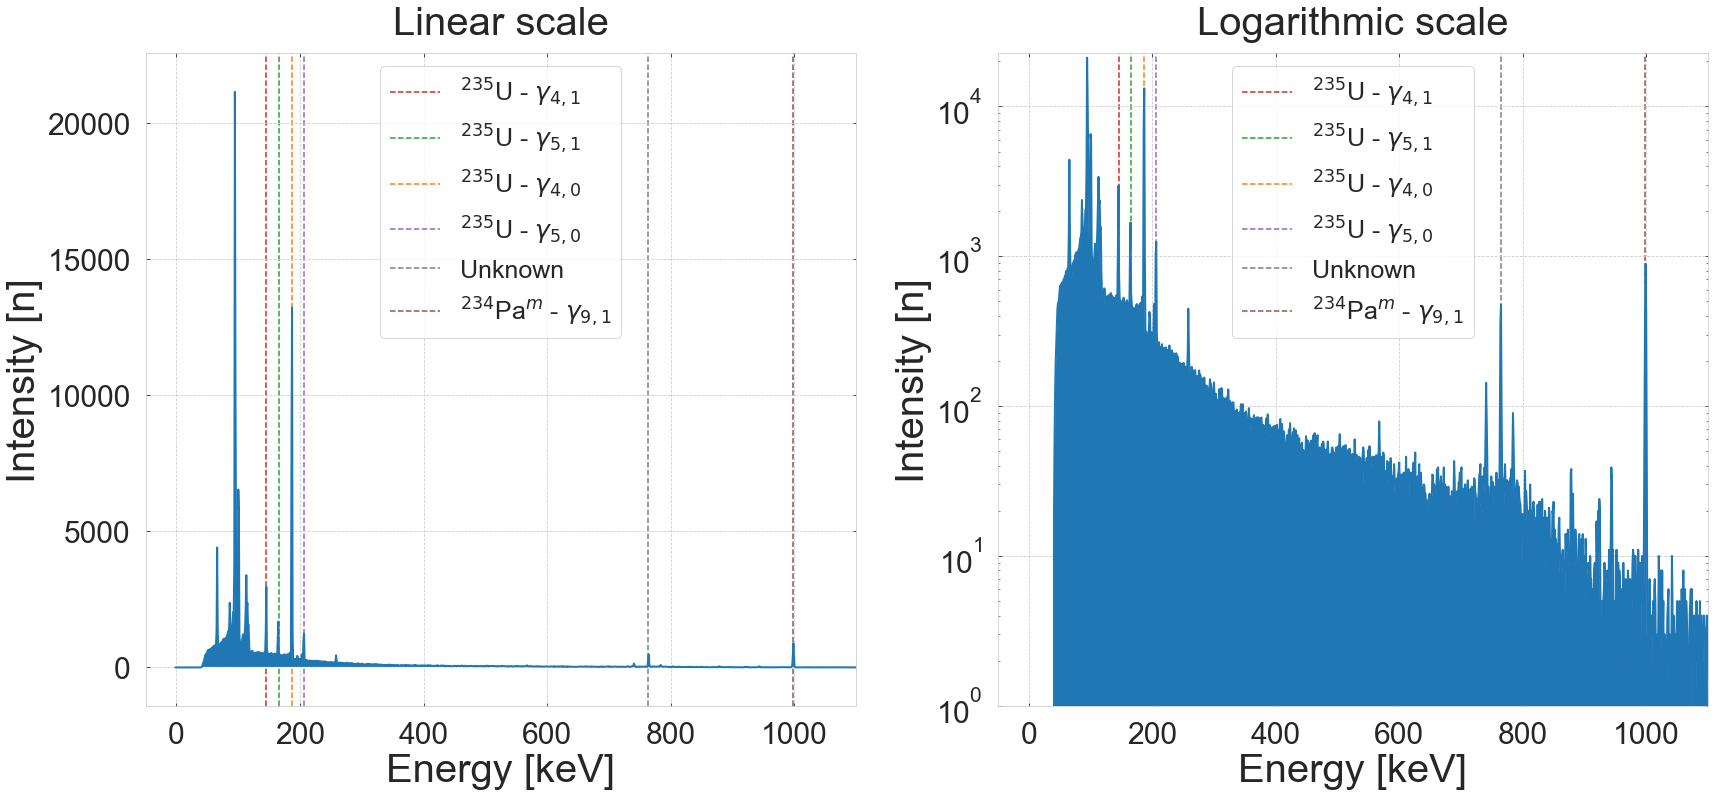

In [176]:
lim = True

if lim:
    ymin_lim = 0 - np.max(data_bin)*(1/15)
    ymax_lim = np.max(data_bin)*(1 + 1/15)
    plot_spectra(lims=([-50,1100], [ymin_lim, ymax_lim]), save=True, plot_type='line')
else:
    plot_spectra(lims=None, save=True, plot_type='line')

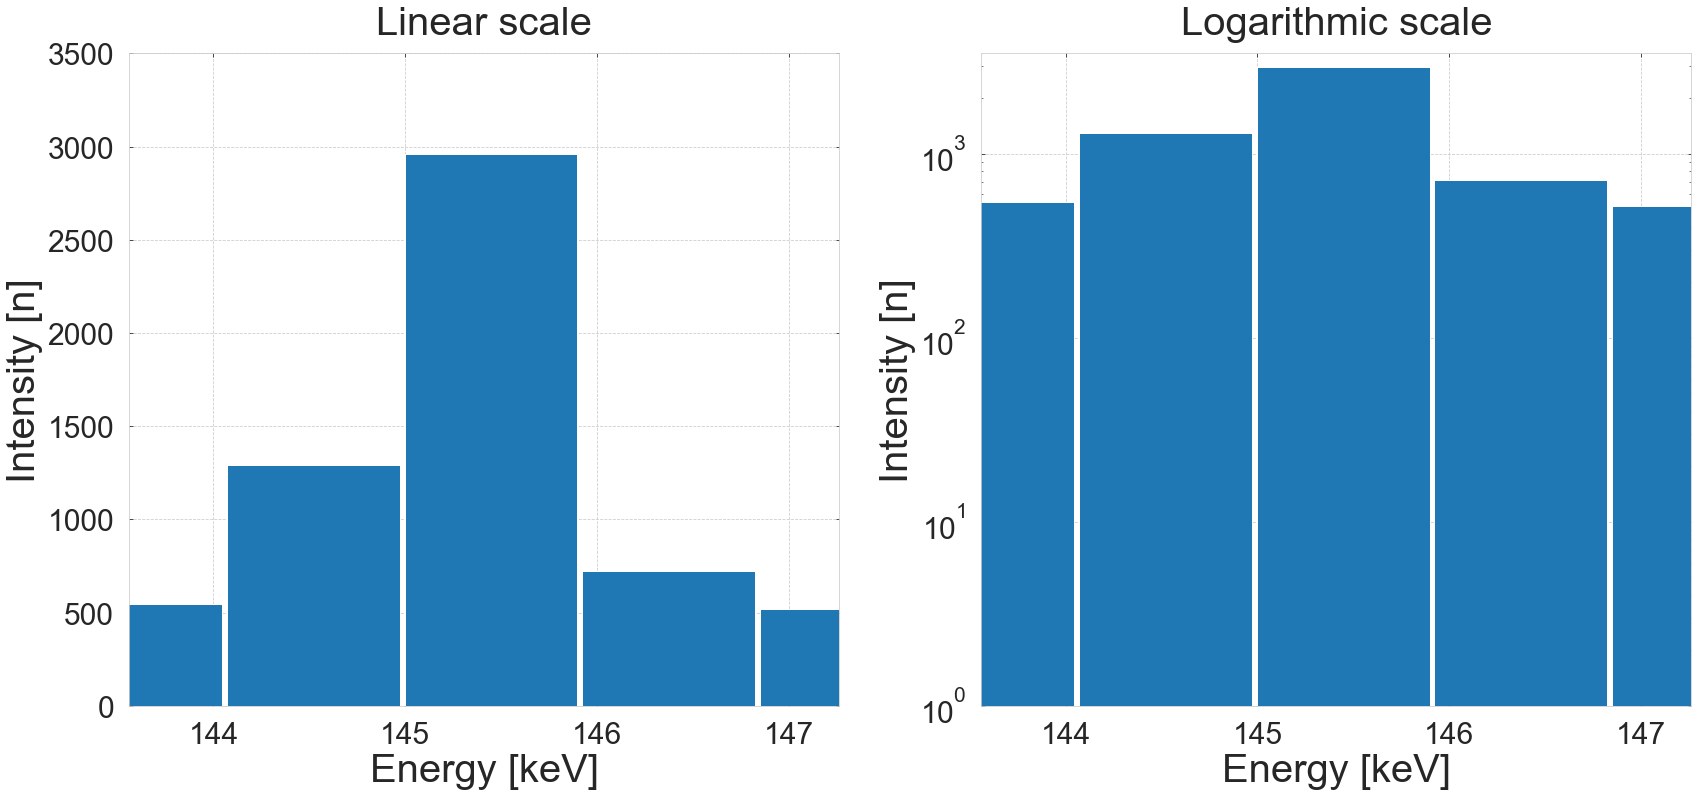

In [170]:
i = 0
plot_spectra(lims=(data_roi_e[i], data_roi_y[i]), save=True, plot_type='hist', name=gamma_names[i])